<a href="https://colab.research.google.com/github/patrickabadi/gen-ai-notebooks/blob/main/pix2pix_avatars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An attempt to make an AI avatar pipeline

I'm using [InstructPix2Pix](https://www.timothybrooks.com/instruct-pix2pix/) and [diffusers](https://github.com/huggingface/diffusers) to run this pipeline

In [ ]:
#@title Check GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-0e06c5c3-7ad2-f7be-cc16-76fab47c0172)


In [ ]:
#@title Mount Google Drive and Prepare Folders
from google.colab import drive
drive.mount('/content/gdrive')
outputs_path = "/content/gdrive/MyDrive/AI/AIAvatar"
!mkdir -p $outputs_path
print(f"Outputs will be saved to {outputs_path}")

Mounted at /content/gdrive
Outputs will be saved to /content/gdrive/MyDrive/AI/AIAvatar


In [ ]:
#@title Installation

import PIL
import os, random, sys, time
import requests
import torch
import numpy as np
from PIL import Image
from IPython.display import display, clear_output

device = "cuda" if torch.cuda.is_available() else "cpu"
if device != "cuda":
  raise TypeError("You are not running on GPU hardware. Go to `Runtime`->`Change runtime type` and select GPU")

!pip install -qqq git+https://github.com/huggingface/diffusers.git transformers accelerate safetensors
!pip install tqdm

from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler
from tqdm import tqdm

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision="fp16", safety_checker=None)
pipe.to(device)
pipe.enable_attention_slicing()

def load_img(path, shape):
  if path.startswith('http://') or path.startswith('https://'):
      image = Image.open(requests.get(path, stream=True).raw).convert('RGB')
  else:
      if os.path.isdir(path):
          files = [file for file in os.listdir(path) if file.endswith('.png') or file .endswith('.jpg')]
          path = os.path.join(path, random.choice(files))
          print(f"Chose random init image {path}")
      image = Image.open(path).convert('RGB')
  image = image.resize(shape, resample=PIL.Image.LANCZOS)
  return image

def image_grid(imgs, rows, cols):
  #assert len(imgs) == rows * cols
  w, h = imgs[0].size
  grid = Image.new("RGB", size=(cols * w, rows * h))
  grid_w, grid_h = grid.size
  for i, img in enumerate(imgs):
      grid.paste(img, box=(i % cols * w, i // cols * h))
  return grid

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 105.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_instruct_pix2pix.StableDiffusionInstructPix2PixPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


## Prompts

Each prompt in the array will output an image


In [ ]:
text_prompts = [
 "As a marvel superhero",
 "As the hulk",
 "As Batman",
 "As a lord of the rings orc",
 "as an anime character"    
]

Original image


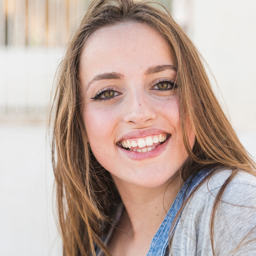

Text Prompts:   0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

As a marvel superhero - saving to /content/gdrive/MyDrive/AI/AIAvatar/output_001/img_000.png


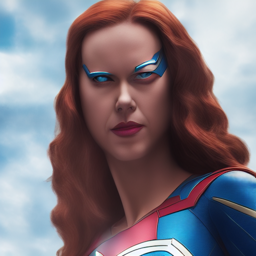

Text Prompts:  20%|██        | 1/5 [00:06<00:25,  6.33s/it]

  0%|          | 0/20 [00:00<?, ?it/s]

As the hulk - saving to /content/gdrive/MyDrive/AI/AIAvatar/output_001/img_001.png


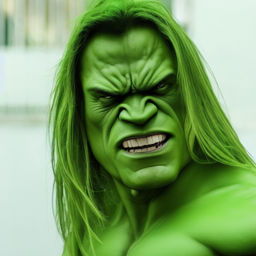

Text Prompts:  40%|████      | 2/5 [00:12<00:18,  6.30s/it]

  0%|          | 0/20 [00:00<?, ?it/s]

As Batman - saving to /content/gdrive/MyDrive/AI/AIAvatar/output_001/img_002.png


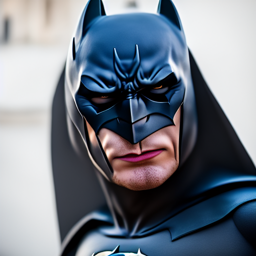

Text Prompts:  60%|██████    | 3/5 [00:18<00:12,  6.33s/it]

  0%|          | 0/20 [00:00<?, ?it/s]

As a lord of the rings orc - saving to /content/gdrive/MyDrive/AI/AIAvatar/output_001/img_003.png


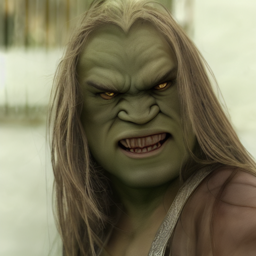

Text Prompts:  80%|████████  | 4/5 [00:25<00:06,  6.36s/it]

  0%|          | 0/20 [00:00<?, ?it/s]

as an anime character - saving to /content/gdrive/MyDrive/AI/AIAvatar/output_001/img_004.png


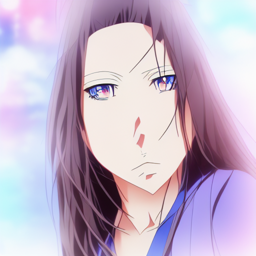

Text Prompts: 100%|██████████| 5/5 [00:31<00:00,  6.35s/it]


In [ ]:
#@title Run batch

#@markdown `output_folder`: subfolder where images are saved<br>
#@markdown `width_height`: output image dimensions<br>
#@markdown `guidance_scale`: (7-11) strength of text prompt<br>
#@markdown `steps`: (20-100) number of diffusion steps<br>
#@markdown `init_image`: starting image used to transform<br>

output_folder = "output_001" #@param {type:"string"}
width_height = [512, 512] #@param{type: 'raw'}
guidance_scale = 1 #@param {type:"number"}
steps = 20 #@param {type:"integer"}
init_image = "https://img.freepik.com/free-photo/portrait-happy-young-woman-looking-camera_23-2147892777.jpg?w=826&t=st=1677352683~exp=1677353283~hmac=2ddcbac46c86e4e3c2b3ff204af4780d25a166e6a52886f9f605fa03767ab066" #@param {type:"string"}

if output_folder == "":
  raise ValueError("`output_folder` is not set properly")

if init_image == "":
  raise ValueError("`init_image` is not set properly")

output_dir = os.path.join(outputs_path, output_folder)
os.makedirs(output_dir, exist_ok=True)

input_image = load_img(init_image, shape=(width_height[0], width_height[1]))
print(f"Original image")
display(input_image.resize(size=(256,256)))

outputs = []
pad = '0'
num_digits = 3
for i,prompt in enumerate(tqdm(text_prompts, desc="Text Prompts")):
  img = pipe(prompt, image=input_image, num_inference_steps=steps, image_guidance_scale=guidance_scale).images[0]
  outputs.append(img)

  filepath = os.path.join(output_dir, f"img_{i:{pad}{num_digits}}.png")
  print(f"{prompt} - saving to {filepath}")
  img.save(filepath)

  #clear_output(wait=True)
  display(img.resize(size=(256,256)))

#image_grid(outputs, rows=1, cols=4)